# TEMPLATE FOR GRAPHING FUNCTION

### Using Teenage Attitudes & Practices Survey (ICPSR 9786)

### (Documentation)

### Data:

In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from ipywidgets import Button, HBox, VBox
from IPython.display import clear_output
import ipywidgets as widgets
import pandas as pd
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('35535-0001-Data.tsv', sep= '\t')
df.head(5)

,CASEID,ID,Q1A,Q1B,Q1C1,Q1C2,Q1C3,Q1C4,Q1C5,Q1C6,...,Q5I3,Q5I4,ZIPCODE,GENDER,WEIGHT,DISTRICT,STATE,USRCOFIX,CM_SEG,VERSION
0,1,50001,5,3,0,0,0,0,0,0,...,,1,-1,1,5.43,3,33,,,3
1,2,50005,3,2,5,2,2,5,0,0,...,,2,-1,2,0.90,1,23,,,3
2,3,50006,3,3,5,0,10,10,0,0,...,,2,-1,2,0.99,7,8,,,3
3,4,50007,3,3,0,0,0,1,0,0,...,,2,-1,2,1.06,7,10,,,3
4,5,50008,3,2,5,5,5,5,2,1,...,,1,-1,1,1.21,7,34,,,3


### Graph Template:

A Jupyter Widget

A Jupyter Widget

Graph 1:


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

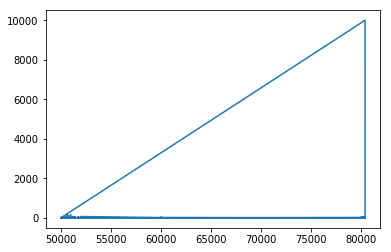

In [38]:
style = {'description_width': 'initial'}

# set up initial text box and button
graphs_num = widgets.IntText(value = 1, description = "Number of Graphs", style = style)
graphs_ex = widgets.Button(description = "Execute")

# set up the graph widgets
x_axis = []
x_filter = []
x_filter_num = []
y_axis = []
y_filter = []
y_filter_num = []
graph_type = []

# create graph button
run_graph = widgets.Button(description = "Graph!")

# display setup buttons
display(graphs_num)
display(graphs_ex)
x_axis.append(widgets.Dropdown(options = list(df), description = "X Variable", style = style))
x_filter.append(widgets.Dropdown(options = ["No Filter", "=", "!=", ">", ">=", "<", "<="], description = "Filter:", style = style))
x_filter_num.append(widgets.IntText(value = 0))
y_axis.append(widgets.Dropdown(options = list(df), description = "Y Variable", style = style))
y_filter.append(widgets.Dropdown(options = ["No Filter", "=", "!=", ">", ">=", "<", "<="], description = "Filter:", style = style))
y_filter_num.append(widgets.IntText(value = 0))
graph_type.append(widgets.Dropdown(options = ["Bar (Sum)", "Line (Trends)", "Pie (Percent)"], description = "Type:", style = style))
x_group = HBox([x_axis[0], x_filter[0], x_filter_num[0]])
y_group = HBox([y_axis[0], y_filter[0], y_filter_num[0]])
x_and_y = VBox([x_group, y_group]), VBox([x_group, y_group])
print ("Graph 1:")
display(x_and_y[0])
display(graph_type[0])
display(run_graph)

print_x = []
print_y = []
xvar = []

# create graphs
def publish_graph(p):
    clear_output()
    display(graphs_num)
    display(graphs_ex)
    
    for i in range(graphs_num.value):     
        x_group = HBox([x_axis[i], x_filter[i], x_filter_num[i]])    
        y_group = HBox([y_axis[i], y_filter[i], y_filter_num[i]])
        x_and_y = VBox([x_group, y_group]), VBox([x_group, y_group])
        print ("Graph %d:" %(i+1))
        display(x_and_y[0])
        display(graph_type[i])
    display(run_graph)
    
    for i in range(graphs_num.value):
        if x_filter[i].value == 'No Filter':
            for j in range(len(df)):
                xvar.append(j)        
        elif x_filter[i].value == "=":
            for j in range(len(df)):
                if df[x_axis[i].value][j] == x_filter_num[i].value:
                    xvar.append(j)
        elif (x_filter[i].value == "!="):
            for j in range(len(df)):
                if df[x_axis[i].value][j] != x_filter_num[i].value:
                    xvar.append(j)     
        elif x_filter[i].value == ">":
            for j in range(len(df)):
                if df[x_axis[i].value][j] > x_filter_num[i].value:
                    xvar.append(j)          
        elif x_filter[i].value == ">=":
            for j in range(len(df)):
                if df[x_axis[i].value][j] >= x_filter_num[i].value:
                    xvar.append(j)           
        elif x_filter[i].value == "<":
            for j in range(len(df)):
                if df[x_axis[i].value][j] < x_filter_num[i].value:
                    xvar.append(j)          
        elif x_filter[i].value == "<=":
            for j in range(len(df)):
                if df[x_axis[i].value][j] <= x_filter_num[i].value:
                    xvar.append(j) 
                    
######## BAR GRAPH ############################################################
######## PIE CHART ############################################################

        if graph_type[i].value == "Bar (Sum)" or graph_type[i].value == "Pie (Percent)":         
            if y_filter[i].value == "No Filter":
                for k in range(len(xvar)):
                    print_y.append(df[y_axis[i].value][xvar[k]])
         
            elif (y_filter[i].value == "="):
                for k in range(len(xvar)):
                    if (df[y_axis[i].value][xvar[k]] == y_filter_num[i].value):
                        print_y.append(df[y_axis[i].value][xvar[k]])   
        
            elif (y_filter[i].value == "!="):
                for k in range(len(xvar)):
                    if (df[y_axis[i].value][xvar[k]] != y_filter_num[i].value):
                        print_y.append(df[y_axis[i].value][xvar[k]]) 
       
            elif (y_filter[i].value == ">"):
                for k in range(len(xvar)):
                    if (df[y_axis[i].value][xvar[k]] > y_filter_num[i].value):
                        print_y.append(df[y_axis[i].value][xvar[k]]) 
                        
            elif (y_filter[i].value == ">="):
                for k in range(len(xvar)):
                    if (df[y_axis[i].value][xvar[k]] >= y_filter_num[i].value):
                        print_y.append(df[y_axis[i].value][xvar[k]]) 
                        
            elif (y_filter[i].value == "<"):
                for k in range(len(xvar)):
                    if (df[y_axis[i].value][xvar[k]] < y_filter_num[i].value):
                        print_y.append(df[y_axis[i].value][xvar[k]]) 
                        
            elif (y_filter[i].value == "<="):
                for k in range(len(xvar)):
                    if (df[y_axis[i].value][xvar[k]] <= y_filter_num[i].value):
                        print_y.append(df[y_axis[i].value][xvar[k]])
                        
            D = Counter(print_y)
                        
######## LINE GRAPH ############################################################

        else:
            if (y_filter[i].value == "No Filter"):
                for k in range(len(xvar)):
                    print_x.append(df[x_axis[i].value][xvar[k]])
                    print_y.append(df[y_axis[i].value][xvar[k]])           
            elif (y_filter[i].value == "="):
                for k in range(len(xvar)):
                    if (df[y_axis[i].value][k] == y_filter_num[i].value):
                        print_x.append(df[x_axis[i].value][xvar[k]])
                        print_y.append(df[y_axis[i].value][xvar[k]])          
            elif (y_filter[i].value == "!="):
                for k in range(len(xvar)):
                    if (df[y_axis[i].value][k] != y_filter_num[i].value):
                        print_x.append(df[x_axis[i].value][xvar[k]])
                        print_y.append(df[y_axis[i].value][xvar[k]])  
            elif (y_filter[i].value == ">"):
                for k in range(len(xvar)):
                    if (df[y_axis[i].value][k] > y_filter_num[i].value):
                        print_x.append(df[x_axis[i].value][xvar[k]])
                        print_y.append(df[y_axis[i].value][xvar[k]])             
            elif (y_filter[i].value == ">="):
                for k in range(len(xvar)):
                    if (df[y_axis[i].value][k] >= y_filter_num[i].value):
                        print_x.append(df[x_axis[i].value][xvar[k]])
                        print_y.append(df[y_axis[i].value][xvar[k]])            
            elif (y_filter[i].value == "<"):
                for k in range(len(xvar)):
                    if (df[y_axis[i].value][k] < y_filter_num[i].value):
                        print_x.append(df[x_axis[i].value][xvar[k]])
                        print_y.append(df[y_axis[i].value][xvar[k]])            
            elif (y_filter[i].value == "<="):
                for k in range(len(xvar)):
                    if (df[y_axis[i].value][k] <= y_filter_num[i].value):
                        print_x.append(df[x_axis[i].value][xvar[k]])
                        print_y.append(df[y_axis[i].value][xvar[k]])  
########## Print Graph ########################################################                    
        #print(print_x)
        #print(print_y)
        plt.figure()
        if (graph_type[i].value == "Bar (Sum)"):
            plt.bar(range(len(D)), list(D.values()), align='center')
            plt.xticks(range(len(D)), list(D.keys()))
            
        elif (graph_type[i].value == "Pie (Percent)"):
            plt.pie([float(v) for v in D.values()], labels=[float(k) for k in D], autopct='%1.1f%%')
        else:
            plt.plot(print_x, print_y)
            
        print_x.clear()
        print_y.clear()
        xvar.clear()
            
def run_setup(r):
    clear_output()
    display(graphs_num)
    display(graphs_ex)
    for i in range(graphs_num.value):
        x_axis.append(widgets.Dropdown(options = list(df), description = "X Variable", style = style))
        x_filter.append(widgets.Dropdown(options = ["No Filter", "=", "!=", ">", ">=", "<", "<="], description = "Filter:", style = style))
        x_filter_num.append(widgets.IntText(value = 0))
        y_axis.append(widgets.Dropdown(options = list(df), description = "Y Variable", style = style))
        y_filter.append(widgets.Dropdown(options = ["No Filter", "=", "!=", ">", ">=", "<", "<="], description = "Filter:", style = style))
        y_filter_num.append(widgets.IntText(value = 0))
        graph_type.append(widgets.Dropdown(options = ["Bar (Sum)", "Line (Trends)", "Pie (Percent)"], description = "Type:", style = style))
        
        x_group = HBox([x_axis[i], x_filter[i], x_filter_num[i]])
        y_group = HBox([y_axis[i], y_filter[i], y_filter_num[i]])
        x_and_y = VBox([x_group, y_group]), VBox([x_group, y_group])
        print ("Graph %d:" %(i+1))
        display(x_and_y[0])
        display(graph_type[i])
    display(run_graph)
    
graphs_ex.on_click(run_setup)
run_graph.on_click(publish_graph)

